First let's generate a few random points on a 2D plane.

We have to import a few things, namely:
- numpy for generating random numbers
- matplotlib.pyplot for plotting
- cv2 for image processing
- io for reading and writing files into memory
- scipy.spatial for calculating the Voronoi diagram

In [155]:
import cv2
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

np.random.seed(0)
rng = np.random.default_rng()

Let's setup our figures. We're gonna need 3 subplots:
- the base image
- openCV processing output
- Voronoi diagram.

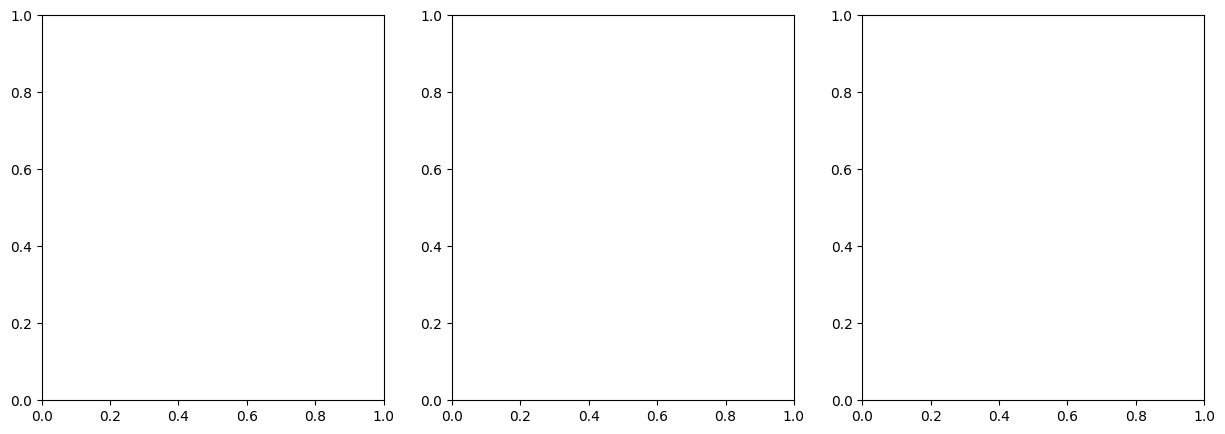

In [156]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) #(5+5+5)*5
ax1: plt.Axes = axs[0]
ax2: plt.Axes = axs[1]
ax3: plt.Axes = axs[2]

Generate black donts on a white background to use as our base image

In [207]:
def generate_image(ax: plt.Axes,n_points: int = 20):
    ax1.clear()
    # Generate random points
    points = rng.uniform(low=50, high=100, size=(n_points, 2))

    # Turn off axis and labels
    ax.axis("off")

    # Plot the points as black dots
    ax.scatter(points[:, 0], points[:, 1], s=1, c="k")
    ax.set_title(f'{n_points} Random Points', fontsize=14)

    # Save the figure to the buffer
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    img = io.BytesIO()
    fig.savefig(img, bbox_inches=extent, pad_inches=0, format="png")
    img.seek(0)
    # Save the image to disk
    with open("images/random_points.png", "wb") as f:
        f.write(img.getbuffer())
    return img


img = generate_image(ax=ax1)